In [2]:
#Import the standard libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
HORIZON = 10

In [4]:
data = pd.read_csv("../EURUSD Market Data As Series Indicators.csv")
data

Time     Open     High      Low    Close      MA O  \
0     2014.04.11 00:00:00  1.38868  1.39057  1.38632  1.38844  1.379556   
1     2014.04.14 00:00:00  1.38573  1.38627  1.38080  1.38181  1.382686   
2     2014.04.15 00:00:00  1.38185  1.38332  1.37899  1.38133  1.384230   
3     2014.04.16 00:00:00  1.38133  1.38507  1.38035  1.38160  1.384586   
4     2014.04.17 00:00:00  1.38160  1.38645  1.38109  1.38131  1.383838   
...                   ...      ...      ...      ...      ...       ...   
2994  2025.10.22 00:00:00  1.15965  1.16224  1.15768  1.16089  1.164434   
2995  2025.10.23 00:00:00  1.16079  1.16201  1.15852  1.16175  1.163756   
2996  2025.10.24 00:00:00  1.16152  1.16489  1.16008  1.16253  1.162414   
2997  2025.10.27 00:00:00  1.16290  1.16520  1.16175  1.16447  1.161750   
2998  2025.10.28 00:00:00  1.16467  1.16689  1.16254  1.16510  1.161906   

          MA H      MA L      MA C        RSI  Stoch Main  Stoch Signal  
0     1.384528  1.378238  1.383212  59.858479   93.333333     93.333333  
1     1.386816  1.380478  1.384750  52.398452   80.003308     80.003308  
2     1.387248  1.381534  1.385124  51.896750   60.067447     60.067447  
3     1.387022  1.382006  1.384372  52.172737   34.251585     34.251585  
4     1.386336  1.381510  1.382898  51.830523   23.139340     23.139340  
...        ...       ...       ...        ...         ...           ...  
2994  1.167512  1.161968  1.163702  44.383617   28.054783     28.054783  
2995  1.166032  1.160948  1.162316  45.309289   17.105263     17.105263  
2996  1.164448  1.159974  1.161818  46.179770   30.211706     30.211706  
2997  1.163974  1.159556  1.161904  48.369655   47.794341     47.794341  
2998  1.164246  1.160114  1.162948  49.090393   70.723562     70.723562  

[2999 rows x 12 columns]

In [5]:
data['Price Target'] = data['Close'].shift(-HORIZON) - data['Close']
data['MA C Target']  =  data['MA C'].shift(-HORIZON) - data['MA C']
data['Stoch Target'] = data['Stoch Main'].shift(-HORIZON) - data['Stoch Main']
data['RSI Target']   = data['RSI'].shift(-HORIZON) - data['RSI']

In [6]:
data['Price Target 2'] = 0
data['MA C Target 2']  = 0
data['Stoch Target 2'] = 0
data['RSI Target 2']   = 0

In [7]:
data.loc[data['Close'].shift(-HORIZON) > data['Close'],'Price Target 2']            = 1
data.loc[data['MA C'].shift(-HORIZON) > data['MA C'],'MA C Target 2']               = 1
data.loc[data['Stoch Main'].shift(-HORIZON) > data['Stoch Main'],'Stoch Target 2']  = 1
data.loc[data['RSI'].shift(-HORIZON) > data['RSI'],'RSI Target 2']                  = 1

In [8]:
#Drop the last 3 years of historical data
data = data.iloc[:-(365*3),:]
test = data.iloc[-(365*3):,:]

In [9]:
data

Time     Open     High      Low    Close      MA O  \
0     2014.04.11 00:00:00  1.38868  1.39057  1.38632  1.38844  1.379556   
1     2014.04.14 00:00:00  1.38573  1.38627  1.38080  1.38181  1.382686   
2     2014.04.15 00:00:00  1.38185  1.38332  1.37899  1.38133  1.384230   
3     2014.04.16 00:00:00  1.38133  1.38507  1.38035  1.38160  1.384586   
4     2014.04.17 00:00:00  1.38160  1.38645  1.38109  1.38131  1.383838   
...                   ...      ...      ...      ...      ...       ...   
1899  2021.08.09 00:00:00  1.17568  1.17690  1.17349  1.17362  1.183106   
1900  2021.08.10 00:00:00  1.17358  1.17429  1.17098  1.17203  1.180482   
1901  2021.08.11 00:00:00  1.17184  1.17540  1.17061  1.17388  1.177588   
1902  2021.08.12 00:00:00  1.17380  1.17482  1.17237  1.17296  1.175628   
1903  2021.08.13 00:00:00  1.17290  1.18048  1.17281  1.17962  1.173560   

          MA H      MA L      MA C        RSI  Stoch Main  Stoch Signal  \
0     1.384528  1.378238  1.383212  59.858479   93.333333     93.333333   
1     1.386816  1.380478  1.384750  52.398452   80.003308     80.003308   
2     1.387248  1.381534  1.385124  51.896750   60.067447     60.067447   
3     1.387022  1.382006  1.384372  52.172737   34.251585     34.251585   
4     1.386336  1.381510  1.382898  51.830523   23.139340     23.139340   
...        ...       ...       ...        ...         ...           ...   
1899  1.185098  1.180080  1.180608  34.610082    3.200205      3.200205   
1900  1.182090  1.177202  1.177740  33.159372    3.700000      3.700000   
1901  1.179176  1.174668  1.175782  36.478592    8.797944      8.797944   
1902  1.176996  1.172578  1.173720  35.538281   14.173396     14.173396   
1903  1.176378  1.172052  1.174422  46.278868   38.560886     38.560886   

      Price Target  MA C Target  Stoch Target  RSI Target  Price Target 2  \
0         -0.00514    -0.001614    -35.975015   -5.303970               0   
1          0.00316    -0.002046    -11.823436    4.426214               1   
2         -0.00017    -0.002294     -7.149622   -1.255660               0   
3          0.00493    -0.000556     27.018478    5.434699               1   
4          0.00539     0.001634     43.102906    5.978886               1   
...            ...          ...           ...         ...             ...   
1899       0.00095    -0.009812     28.896691   10.116574               1   
1900       0.00352    -0.005996     54.591457   12.880482               1   
1901       0.00328    -0.002822     75.831351   11.727259               1   
1902       0.00219     0.000758     73.659887   10.211143               1   
1903      -0.00007     0.001974     50.410137    5.262150               0   

      MA C Target 2  Stoch Target 2  RSI Target 2  
0                 0               0             0  
1                 0               0             1  
2                 0               0             0  
3                 0               1             1  
4                 1               1             1  
...             ...             ...           ...  
1899              0               1             1  
1900              0               1             1  
1901              0               1             1  
1902              1               1             1  
1903              1               1             1  

[1904 rows x 20 columns]

In [10]:
data.iloc[:,1:12]

Open     High      Low    Close      MA O      MA H      MA L  \
0     1.38868  1.39057  1.38632  1.38844  1.379556  1.384528  1.378238   
1     1.38573  1.38627  1.38080  1.38181  1.382686  1.386816  1.380478   
2     1.38185  1.38332  1.37899  1.38133  1.384230  1.387248  1.381534   
3     1.38133  1.38507  1.38035  1.38160  1.384586  1.387022  1.382006   
4     1.38160  1.38645  1.38109  1.38131  1.383838  1.386336  1.381510   
...       ...      ...      ...      ...       ...       ...       ...   
1899  1.17568  1.17690  1.17349  1.17362  1.183106  1.185098  1.180080   
1900  1.17358  1.17429  1.17098  1.17203  1.180482  1.182090  1.177202   
1901  1.17184  1.17540  1.17061  1.17388  1.177588  1.179176  1.174668   
1902  1.17380  1.17482  1.17237  1.17296  1.175628  1.176996  1.172578   
1903  1.17290  1.18048  1.17281  1.17962  1.173560  1.176378  1.172052   

          MA C        RSI  Stoch Main  Stoch Signal  
0     1.383212  59.858479   93.333333     93.333333  
1     1.384750  52.398452   80.003308     80.003308  
2     1.385124  51.896750   60.067447     60.067447  
3     1.384372  52.172737   34.251585     34.251585  
4     1.382898  51.830523   23.139340     23.139340  
...        ...        ...         ...           ...  
1899  1.180608  34.610082    3.200205      3.200205  
1900  1.177740  33.159372    3.700000      3.700000  
1901  1.175782  36.478592    8.797944      8.797944  
1902  1.173720  35.538281   14.173396     14.173396  
1903  1.174422  46.278868   38.560886     38.560886  

[1904 rows x 11 columns]

In [11]:
X = data.iloc[:,1:12]
y = data.iloc[:,12:-4]
y_classif = data.iloc[:,-4:]

X_test = test.iloc[:,1:12]
y_test = test.iloc[:,12:-4]
y_classif_test = test.iloc[:,-4:]

In [12]:
X

Open     High      Low    Close      MA O      MA H      MA L  \
0     1.38868  1.39057  1.38632  1.38844  1.379556  1.384528  1.378238   
1     1.38573  1.38627  1.38080  1.38181  1.382686  1.386816  1.380478   
2     1.38185  1.38332  1.37899  1.38133  1.384230  1.387248  1.381534   
3     1.38133  1.38507  1.38035  1.38160  1.384586  1.387022  1.382006   
4     1.38160  1.38645  1.38109  1.38131  1.383838  1.386336  1.381510   
...       ...      ...      ...      ...       ...       ...       ...   
1899  1.17568  1.17690  1.17349  1.17362  1.183106  1.185098  1.180080   
1900  1.17358  1.17429  1.17098  1.17203  1.180482  1.182090  1.177202   
1901  1.17184  1.17540  1.17061  1.17388  1.177588  1.179176  1.174668   
1902  1.17380  1.17482  1.17237  1.17296  1.175628  1.176996  1.172578   
1903  1.17290  1.18048  1.17281  1.17962  1.173560  1.176378  1.172052   

          MA C        RSI  Stoch Main  Stoch Signal  
0     1.383212  59.858479   93.333333     93.333333  
1     1.384750  52.398452   80.003308     80.003308  
2     1.385124  51.896750   60.067447     60.067447  
3     1.384372  52.172737   34.251585     34.251585  
4     1.382898  51.830523   23.139340     23.139340  
...        ...        ...         ...           ...  
1899  1.180608  34.610082    3.200205      3.200205  
1900  1.177740  33.159372    3.700000      3.700000  
1901  1.175782  36.478592    8.797944      8.797944  
1902  1.173720  35.538281   14.173396     14.173396  
1903  1.174422  46.278868   38.560886     38.560886  

[1904 rows x 11 columns]

In [13]:
#Analyze the market data
U,S,VT = np.linalg.svd(((X-X.mean())/X.std()))

In [14]:
V2 = VT ** 2
np.sum(V2[0])

0.9999999999999983

In [15]:
np.sum(V2[1])

0.9999999999999976

Text(0.5, 1.0, 'Visualizing The First Principal Component Of Our EURUSD Dataset')

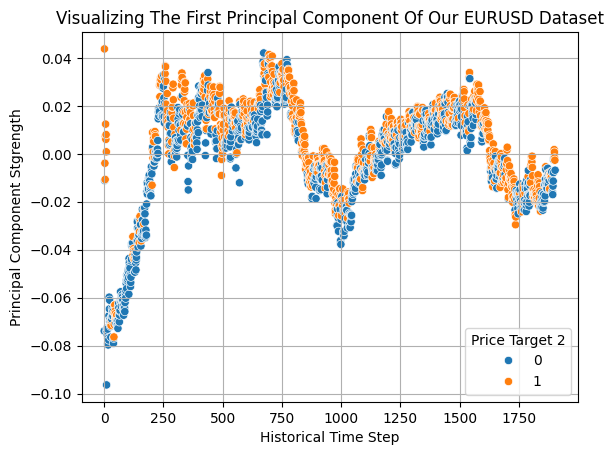

In [16]:
sns.scatterplot(y=U[0],x=np.arange(len(U[0])),hue=data['Price Target 2'])
plt.ylabel('Principal Component Stgrength')
plt.xlabel('Historical Time Step')
plt.grid()
plt.title('Visualizing The First Principal Component Of Our EURUSD Dataset')

Text(0.5, 1.0, 'Visualizing The Second Principal Component Of Our EURUSD Dataset')

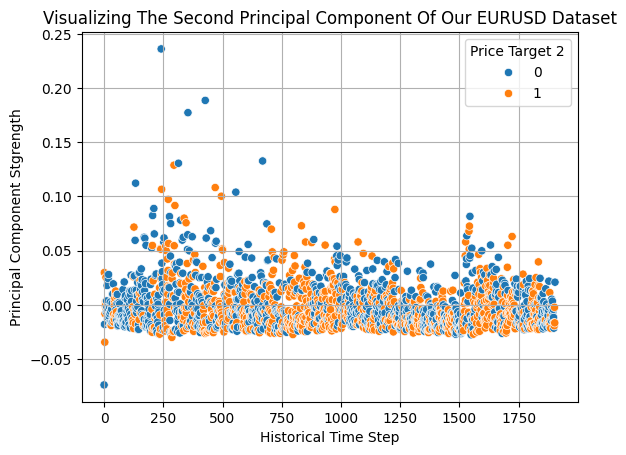

In [17]:
sns.scatterplot(y=U[1],x=np.arange(len(U[0])),hue=data['Price Target 2'])
plt.ylabel('Principal Component Stgrength')
plt.xlabel('Historical Time Step')
plt.grid()
plt.title('Visualizing The Second Principal Component Of Our EURUSD Dataset')

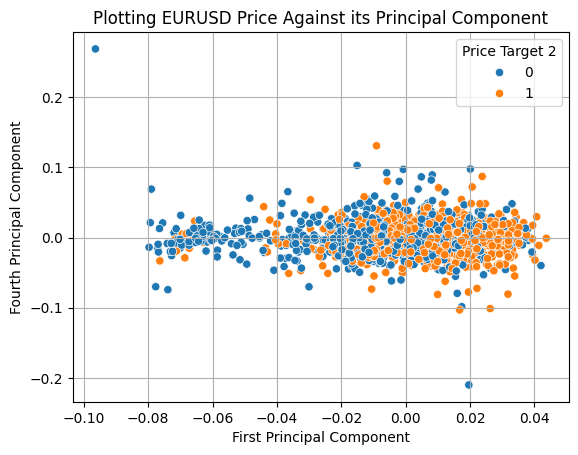

In [43]:
sns.scatterplot(x=U[0],y=U[3],hue=data['Price Target 2'])
plt.ylabel('Fourth Principal Component')
plt.xlabel('First Principal Component')
plt.title('Plotting EURUSD Price Against its Principal Component')
plt.grid()

<Axes: title={'center': 'Singular Values of Our Strategy Returns'}, xlabel='Principle Components', ylabel='Singular Value'>

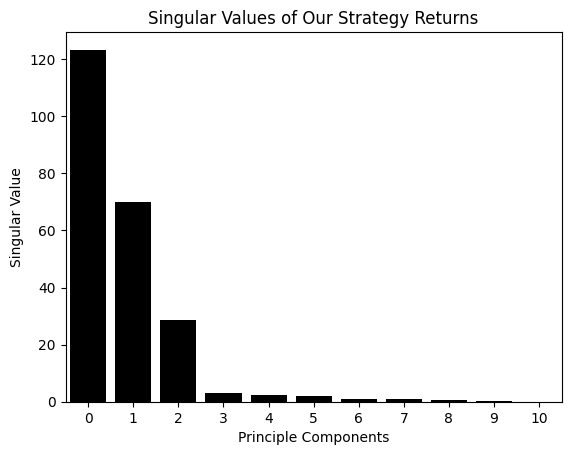

In [420]:
plt.ylabel('Singular Value')
plt.xlabel('Principle Components')
plt.title('Singular Values of Our Strategy Returns')
sns.barplot(S,color='black')

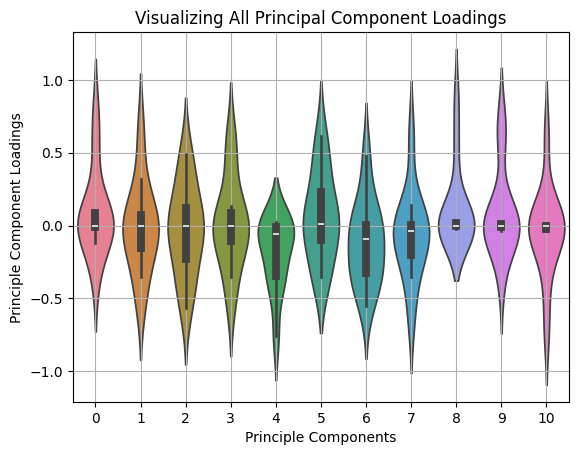

In [26]:
sns.violinplot(VT)
plt.ylabel('Principle Component Loadings')
plt.xlabel('Principle Components')
plt.title('Visualizing All Principal Component Loadings')
plt.grid()

Text(0.5, 0, 'Number of Singular Values Needed To Recreate The Original Dataset')

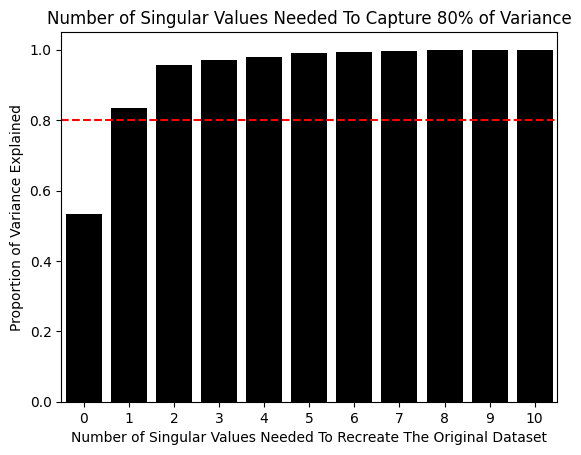

In [422]:
#Standardize and scale the singular values
sigma_scaled = S / np.linalg.norm(S,1)


sns.barplot(np.cumsum(sigma_scaled),color='black')
plt.axhline(0.8,linestyle='--',color='red')
plt.title('Number of Singular Values Needed To Capture 80% of Variance')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Number of Singular Values Needed To Recreate The Original Dataset')

In [423]:
X.corr()

Open      High       Low     Close      MA O      MA H  \
Open          1.000000  0.998479  0.998511  0.996881  0.996240  0.996993   
High          0.998479  1.000000  0.997924  0.998517  0.994588  0.996248   
Low           0.998511  0.997924  1.000000  0.998578  0.995088  0.995663   
Close         0.996881  0.998517  0.998578  1.000000  0.993308  0.994611   
MA O          0.996240  0.994588  0.995088  0.993308  1.000000  0.999546   
MA H          0.996993  0.996248  0.995663  0.994611  0.999546  1.000000   
MA L          0.997027  0.995328  0.996696  0.994743  0.999590  0.999019   
MA C          0.998022  0.997056  0.997386  0.996275  0.999407  0.999567   
RSI          -0.061772 -0.046984 -0.049723 -0.035801 -0.108265 -0.096123   
Stoch Main   -0.012692  0.000031 -0.006230  0.006503 -0.080390 -0.065401   
Stoch Signal -0.012692  0.000031 -0.006230  0.006503 -0.080390 -0.065401   

                  MA L      MA C       RSI  Stoch Main  Stoch Signal  
Open          0.997027  0.998022 -0.061772   -0.012692     -0.012692  
High          0.995328  0.997056 -0.046984    0.000031      0.000031  
Low           0.996696  0.997386 -0.049723   -0.006230     -0.006230  
Close         0.994743  0.996275 -0.035801    0.006503      0.006503  
MA O          0.999590  0.999407 -0.108265   -0.080390     -0.080390  
MA H          0.999019  0.999567 -0.096123   -0.065401     -0.065401  
MA L          1.000000  0.999576 -0.097455   -0.067982     -0.067982  
MA C          0.999576  1.000000 -0.086015   -0.051736     -0.051736  
RSI          -0.097455 -0.086015  1.000000    0.668708      0.668708  
Stoch Main   -0.067982 -0.051736  0.668708    1.000000      1.000000  
Stoch Signal -0.067982 -0.051736  0.668708    1.000000      1.000000

In [32]:
import onnx
from sklearn.linear_model import Ridge,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier,KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from skl2onnx.convert import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.model_selection import RandomizedSearchCV,TimeSeriesSplit,cross_val_score
from sklearn.metrics import root_mean_squared_error

In [28]:
tscv = TimeSeriesSplit(n_splits=5,gap=HORIZON)

In [29]:
def get_model():
    return(Ridge(alpha=1e-3))

In [30]:
#Control model
model_a = get_model()

#Close Moving Average model
model_b = get_model()

#Stoch model
model_c = get_model()

#RSI model
model_d = get_model()

model_a.fit(X,y.iloc[:,0])
model_b.fit(X,y.iloc[:,1])
model_c.fit(X,y.iloc[:,2])
model_d.fit(X,y.iloc[:,3])

Ridge(alpha=0.001)

In [31]:
preds_a = model_a.predict(X_test)
preds_b = model_b.predict(X_test)
preds_c = model_c.predict(X_test)
preds_d = model_d.predict(X_test)

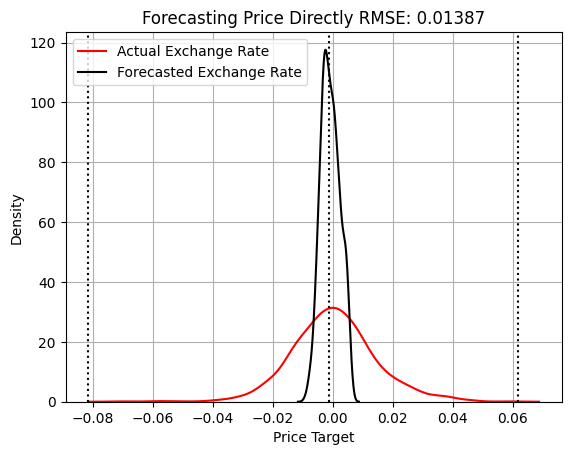

In [62]:
score_1 = root_mean_squared_error(y_test.iloc[:,0],preds_a)
s = 'Forecasting Price Directly RMSE: ' + str(score_1)[:7]
plt.title(s)
sns.kdeplot(y_test.iloc[:,0],color='red')
sns.kdeplot(preds_a,color='black')
plt.axvline(y.iloc[:,0].mean(),color='black',linestyle=':')
plt.axvline(y.iloc[:,0].max(),color='black',linestyle=':')
plt.axvline(y.iloc[:,0].min(),color='black',linestyle=':')
plt.legend(['Actual Exchange Rate','Forecasted Exchange Rate'])
plt.grid()

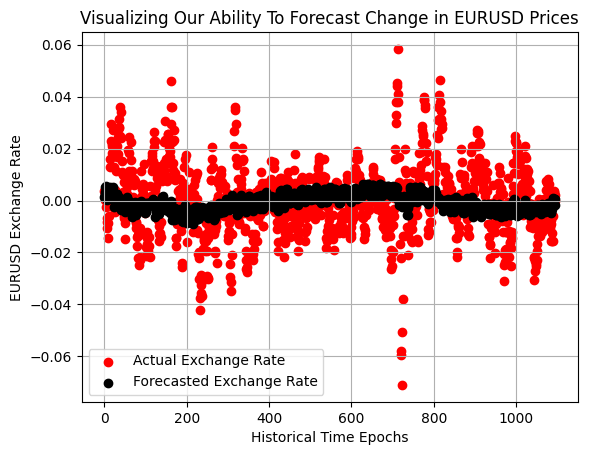

In [ ]:
plt.scatter(x=np.arange(y_test.shape[0]),y=y_test.iloc[:,0],color='red')
plt.scatter(x=np.arange(y_test.shape[0]),y=preds_a,color='black')
plt.legend(['Actual Exchange Rate','Forecasted Exchange Rate'])
plt.xlabel('Historical Time Epochs')
plt.ylabel('EURUSD Exchange Rate')
plt.title('Visualizing Our Ability To Forecast Change in EURUSD Prices')
plt.grid()

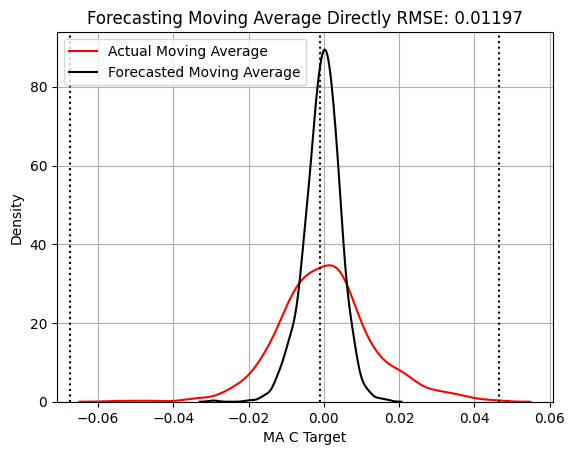

In [61]:
score_2 = root_mean_squared_error(y_test.iloc[:,1],preds_b)
s = 'Forecasting Moving Average Directly RMSE: ' + str(score_2)[:7]
plt.title(s)
sns.kdeplot(y_test.iloc[:,1],color='red')
sns.kdeplot(preds_b,color='black')
plt.axvline(y.iloc[:,1].mean(),color='black',linestyle=':')
plt.axvline(y.iloc[:,1].max(),color='black',linestyle=':')
plt.axvline(y.iloc[:,1].min(),color='black',linestyle=':')
plt.legend(['Actual Moving Average','Forecasted Moving Average'])
plt.grid()

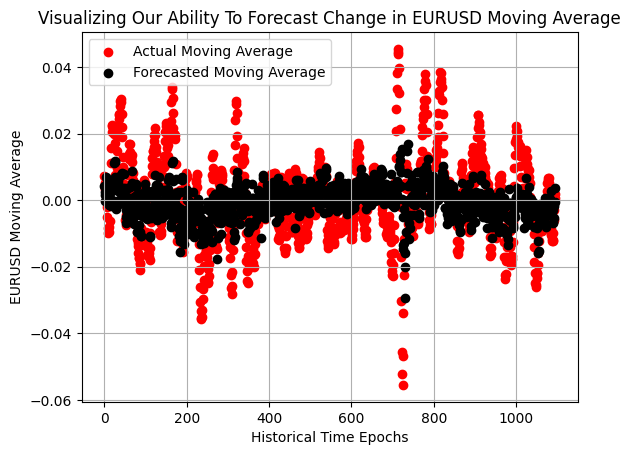

In [57]:
plt.scatter(x=np.arange(y_test.shape[0]),y=y_test.iloc[:,1],color='red')
plt.scatter(x=np.arange(y_test.shape[0]),y=preds_b,color='black')
plt.legend(['Actual Moving Average','Forecasted Moving Average'])
plt.xlabel('Historical Time Epochs')
plt.ylabel('EURUSD Moving Average')
plt.title('Visualizing Our Ability To Forecast Change in EURUSD Moving Average')
plt.grid()

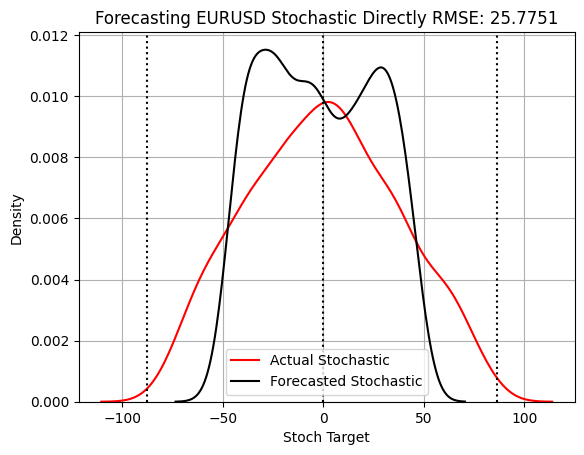

In [63]:
score_3 = root_mean_squared_error(y_test.iloc[:,2],preds_c)
s = 'Forecasting EURUSD Stochastic Directly RMSE: ' + str(score_3)[:7]
plt.title(s)
sns.kdeplot(y_test.iloc[:,2],color='red')
sns.kdeplot(preds_c,color='black')
plt.axvline(y.iloc[:,2].mean(),color='black',linestyle=':')
plt.axvline(y.iloc[:,2].max(),color='black',linestyle=':')
plt.axvline(y.iloc[:,2].min(),color='black',linestyle=':')
plt.legend(['Actual Stochastic','Forecasted Stochastic'])
plt.grid()

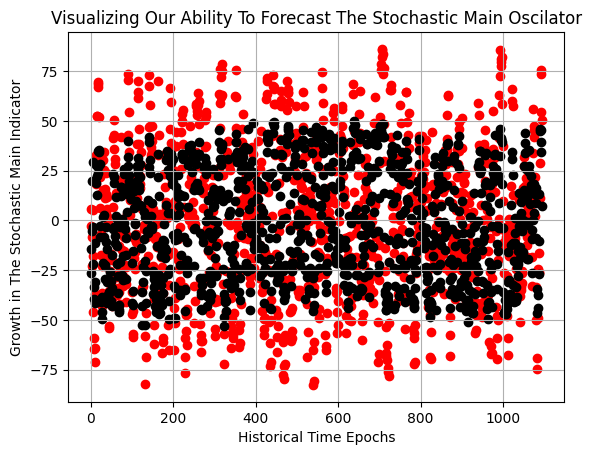

In [ ]:
plt.scatter(x=np.arange(y_test.shape[0]),y=y_test.iloc[:,2],color='red')
plt.scatter(x=np.arange(y_test.shape[0]),y=preds_c,color='black')
plt.ylabel('Growth in The Stochastic Main Indicator')
plt.xlabel('Historical Time Epochs')
plt.title('Visualizing Our Ability To Forecast The Stochastic Main Oscilator')
plt.grid()

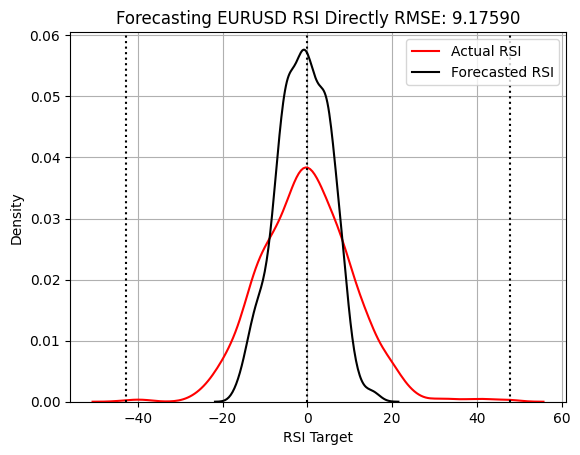

In [70]:
score_4 = root_mean_squared_error(y_test.iloc[:,3],preds_d)
s = 'Forecasting EURUSD RSI Directly RMSE: ' + str(score_4)[:7]
plt.title(s)
sns.kdeplot(y_test.iloc[:,3],color='red')
sns.kdeplot(preds_d,color='black')
plt.axvline(y.iloc[:,3].mean(),color='black',linestyle=':')
plt.axvline(y.iloc[:,3].max(),color='black',linestyle=':')
plt.axvline(y.iloc[:,3].min(),color='black',linestyle=':')
plt.grid()
plt.legend(['Actual RSI','Forecasted RSI'])

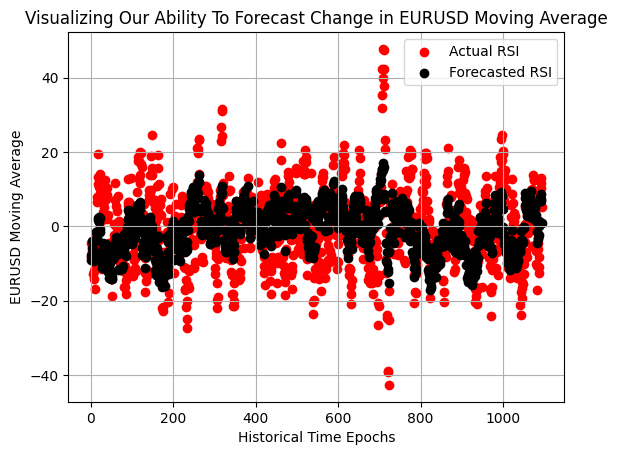

In [71]:
plt.scatter(x=np.arange(y_test.shape[0]),y=y_test.iloc[:,3],color='red')
plt.scatter(x=np.arange(y_test.shape[0]),y=preds_d,color='black')
plt.legend(['Actual RSI','Forecasted RSI'])
plt.xlabel('Historical Time Epochs')
plt.ylabel('EURUSD Moving Average')
plt.title('Visualizing Our Ability To Forecast Change in EURUSD Moving Average')
plt.grid()

Text(0.5, 1.0, 'Our Accuracy Changes Depending On The Target')

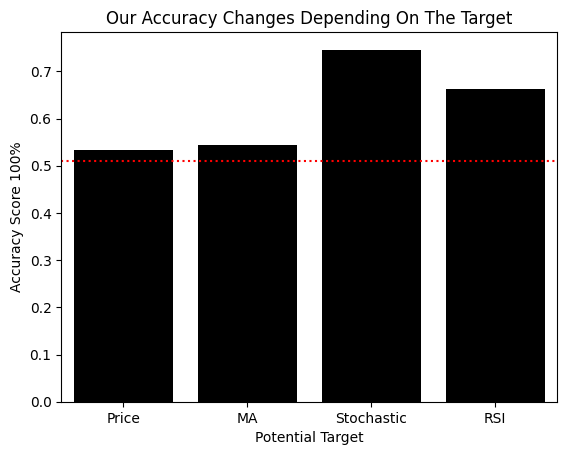

In [438]:
def get_model():
    return(AdaBoostClassifier())

#Control model
model_a = get_model()

#Close Moving Average model
model_b = get_model()

#Stoch model
model_c = get_model()

#RSI model
model_d = get_model()

score   = []

score.append(np.mean(cross_val_score(model_a,X,y_classif.iloc[:,0],cv=tscv,scoring='accuracy',n_jobs=-1)))
score.append(np.mean(cross_val_score(model_b,X,y_classif.iloc[:,1],cv=tscv,scoring='accuracy',n_jobs=-1)))
score.append(np.mean(cross_val_score(model_c,X,y_classif.iloc[:,2],cv=tscv,scoring='accuracy',n_jobs=-1)))
score.append(np.mean(cross_val_score(model_d,X,y_classif.iloc[:,3],cv=tscv,scoring='accuracy',n_jobs=-1)))

h1 = y_classif.loc[y_classif['Price Target 2'] == 1].shape[0] / y_classif.shape[0]
h2 = y_classif.loc[y_classif['MA C Target 2'] == 1].shape[0] / y_classif.shape[0]
h3 = y_classif.loc[y_classif['Stoch Target 2'] == 1].shape[0] / y_classif.shape[0]
h4 = y_classif.loc[y_classif['RSI Target 2'] == 1].shape[0] / y_classif.shape[0]

reward_hacking = [h1,h2,h3,h4]

sns.barplot(score,color='black')
plt.xticks([0,1,2,3],['Price','MA','Stochastic','RSI'])
plt.ylabel('Accuracy Score 100%')
plt.xlabel('Potential Target')
plt.axhline(np.max(reward_hacking),color='red',linestyle=':')
plt.title('Our Accuracy Changes Depending On The Target')

In [439]:
score

[0.5337539432176657,
 0.5444794952681388,
 0.7457413249211357,
 0.6618296529968454]

In [339]:
data.loc[data['Stoch Target 2']==1,'Price Target'].mean()

0.005242425488180883

In [399]:
data.loc[data['Stoch Target 2']==1,'Price Target'].min()

-0.06370000000000009

In [332]:
data.loc[data['Stoch Target 2']==0,'Price Target'].mean()

-0.007713931256713211

In [343]:
dist = {
    'max_iter':[10,50,100,500,1000,5000,10000,50000,100000],
    'activation':['tanh','relu','identity','logistic'],
    'alpha':[10e0,10e-1,10e-2,10e-3,10e-4,10-5,10e-6],
    'solver':['lbfgs','adam','sgd'],
    'learning_rate':['constant','invscaling','adaptive'],
    'hidden_layer_sizes':[(11,1),(11,22,33,44,33,22,11,5),(11,4,40,20,2),(11,11),(11,11,11),(11,11,11,11),(11,22,33,44),(11,22,55,22,11),(11,100,11),(11,5,2,5,11),(11,3,9,18,9,3)]
}

In [344]:
model = MLPRegressor(shuffle=False,early_stopping=False,random_state=0,verbose=True)

In [345]:
rscv = RandomizedSearchCV(model,dist,random_state=0,n_iter=40,scoring='neg_mean_squared_error',cv=tscv,n_jobs=-1,refit=True)

In [347]:
res = rscv.fit(X,y_classif['Stoch Target 2'])
res.best_estimator_

MLPRegressor(activation='identity', alpha=0.01, hidden_layer_sizes=(11, 1),
             learning_rate='invscaling', max_iter=1000, random_state=0,
             shuffle=False, solver='lbfgs', verbose=True)

In [396]:
initial_types = [('float_input',FloatTensorType([1,X.shape[1]]))]
final_types   = [('float_output',FloatTensorType([1,1]))]

In [397]:
onnx_proto = convert_sklearn(model=res.best_estimator_,initial_types=initial_types,final_types=final_types,target_opset=12)

In [398]:
onnx.save(onnx_proto,'Unsupervised Strategy Selection Stochastic MLP.onnx')